In [32]:
import pandas as pd #data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
!pip install pandas-profiling
import pandas_profiling

  Using cached https://files.pythonhosted.org/packages/57/b7/e13216265ae3135ecda13e966aad9ce04b7e7b3e2d87d056b032fc9f457c/pandas_profiling-3.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/c4/d15f1e627fff25443ded77ea70a7b5532d6371498f9285d44d62587e209c/tqdm-4.64.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/17/a2/be45b3bd2fe14cf9173f2337ab87a0f877d6847cf097e641eab4811a8b02/missingno-0.5.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bb/ee/59a884d5ee3c0fbf47c0e449daf87388809dafb48152c045873235851355/matplotlib-3.5.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/40/69/4af412d078cef2298f7d90546fa0e03e65a032558bd85319239c72ae0c3c/scipy-1.7.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/ca/91/6d9b8ccacd0412c08820f72cebaa4f0c0441b5cda699c90f618b6f8a1b42/requests-2.28.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/

scipy 1.7.3 has requirement numpy<1.23.0,>=1.16.5, but you'll have numpy 1.16.2 which is incompatible.
pandas 1.3.5 has requirement numpy>=1.17.3; platform_machine != "aarch64" and platform_machine != "arm64" and python_version < "3.10", but you'll have numpy 1.16.2 which is incompatible.
matplotlib 3.5.2 has requirement numpy>=1.17, but you'll have numpy 1.16.2 which is incompatible.
phik 0.12.2 has requirement numpy>=1.18.0, but you'll have numpy 1.16.2 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\tqdm-4.31.1.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'pandas_profiling'

### Task 1: Initial Data Exploration:

In [9]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.set_index('Date', inplace = True)

In [14]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### Task 2: Univariate Analysis:

Question 1: What does the distribution of customer ratings looks like? is it skewed?

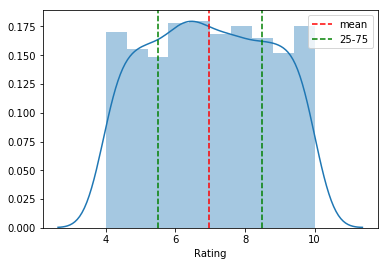

In [16]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c = 'red', ls = '--', label = 'mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c = 'green', ls = '--', label = '25-75')
plt.axvline(x=np.percentile(df['Rating'], 75), c = 'green', ls = '--')
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002462A767D68>,
      dtype=object)

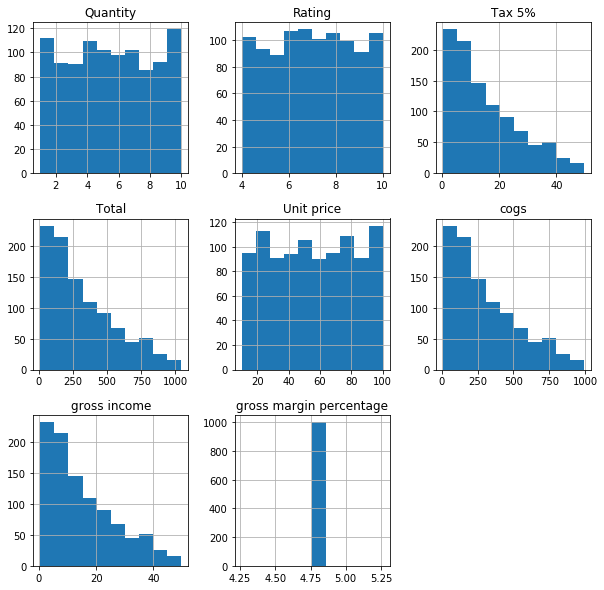

In [17]:
df.hist(figsize = (10, 10))

Question 2: Do aggregate sales numbers differ by much between branches?

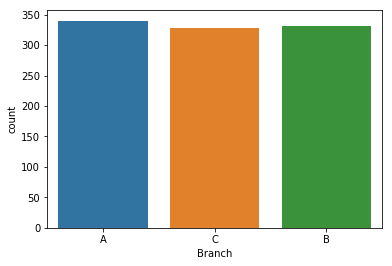

In [18]:
sns.countplot(df['Branch'])

In [19]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

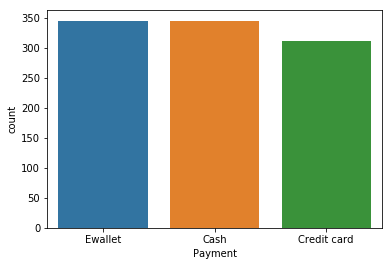

In [20]:
sns.countplot(df['Payment'])

### Task 3: Bivariate Analysis:
Question 3: Is there a relationship between gross income and customer ratings?

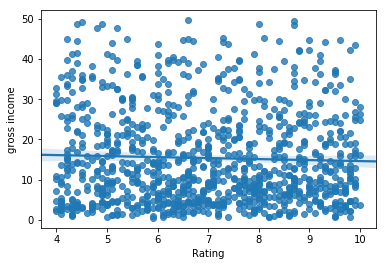

In [21]:
sns.regplot(df['Rating'], df['gross income'])

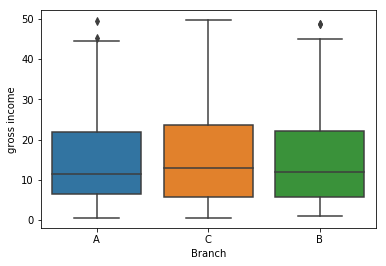

In [22]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

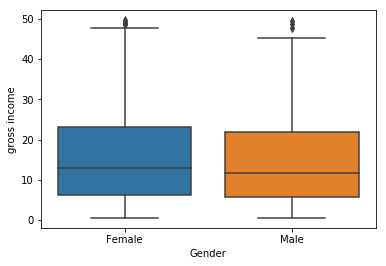

In [23]:
sns.boxplot(x=df['Gender'], y = df['gross income'])

Question 4: Is there a noticable time trend in gross income?

In [24]:
df.groupby(df.index).mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
2019-01-06,59.573333,5.777778,19.122778,401.578333,382.455556,4.761905,19.122778,8.177778
2019-01-07,56.898889,5.888889,14.996000,314.916000,299.920000,4.761905,14.996000,7.633333
2019-01-08,48.792778,5.277778,14.004583,294.096250,280.091667,4.761905,14.004583,6.750000
2019-01-09,47.282500,7.250000,17.984188,377.667938,359.683750,4.761905,17.984188,6.137500


In [25]:
df.groupby(df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

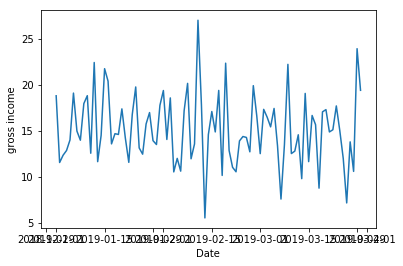

In [26]:
sns.lineplot(x=df.groupby(df.index).mean().index,
            y=df.groupby(df.index).mean()['gross income'])

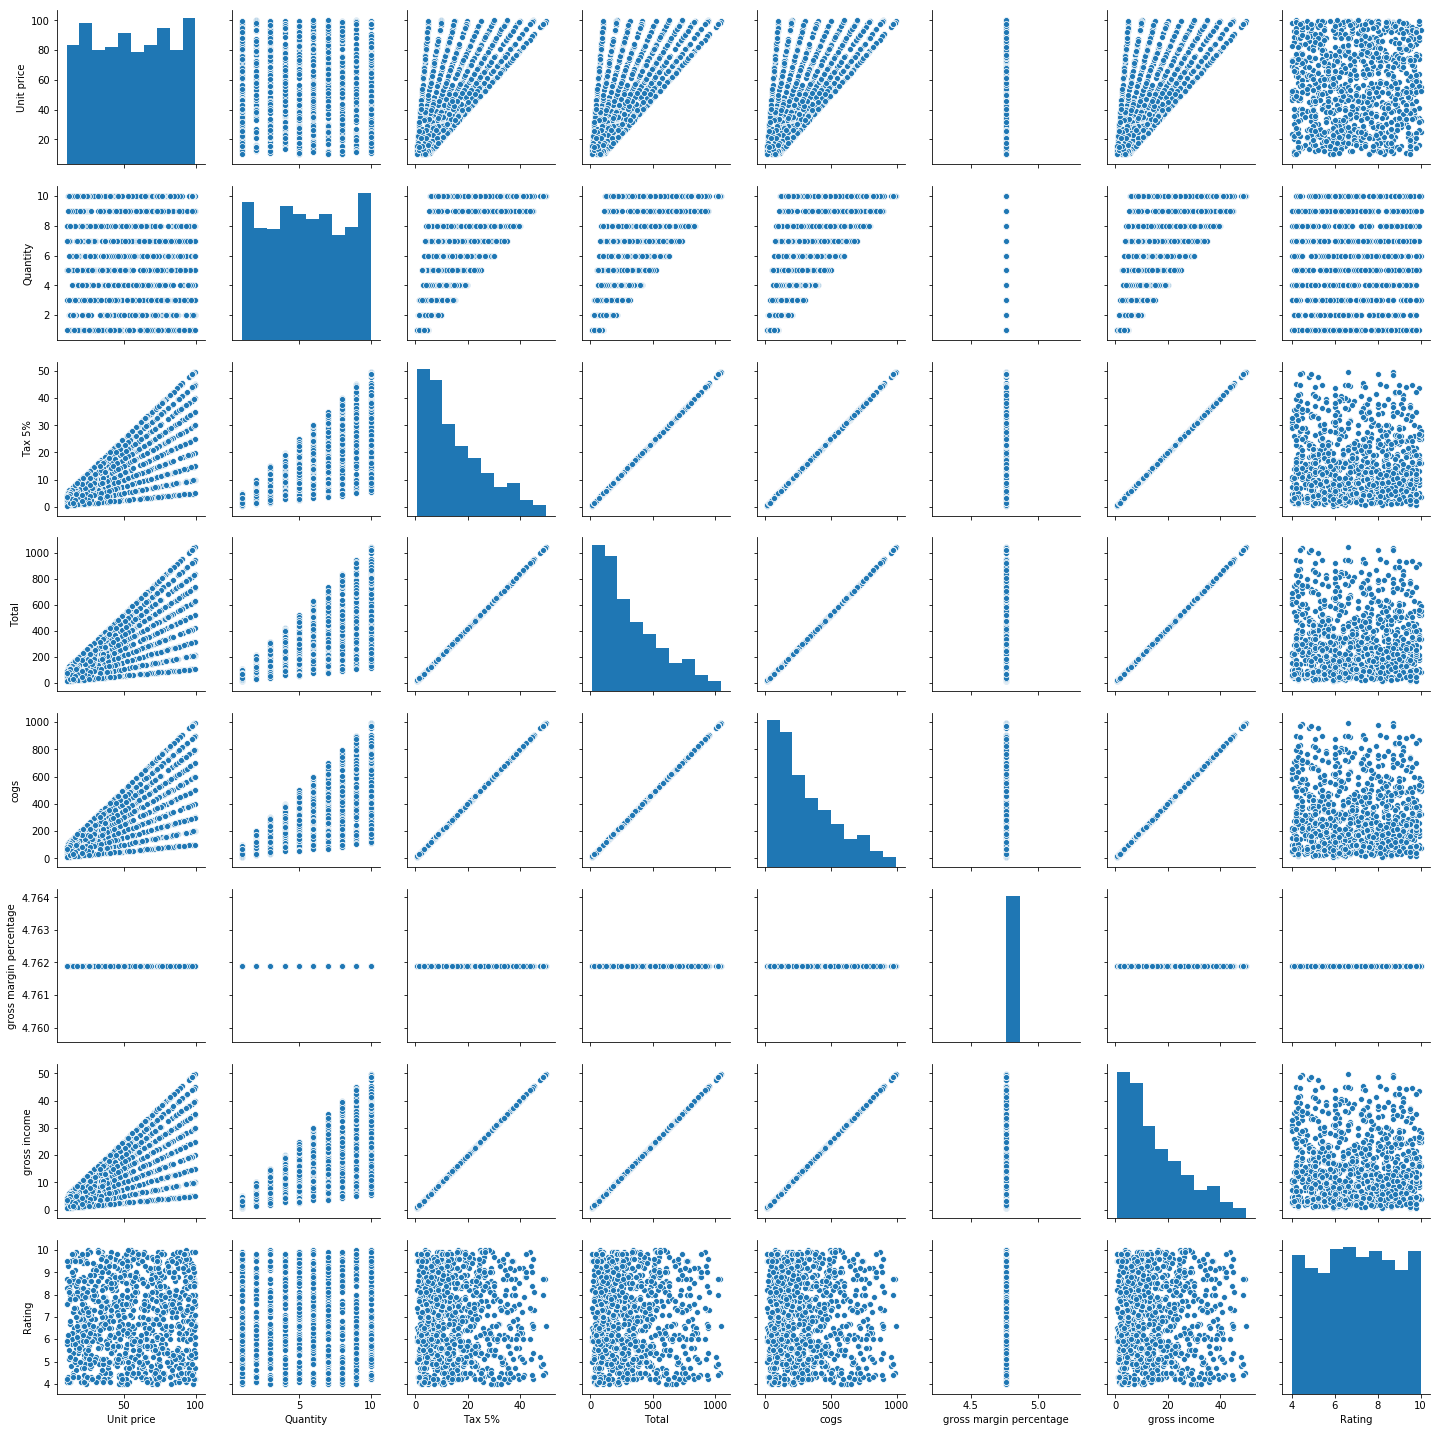

In [27]:
sns.pairplot(df)

### Task 4: Dealing with Duplicate Rows and Missing values:

In [28]:
df.duplicated().sum()

0

In [29]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Task 5: Correlation Analysis:

In [34]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.0,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


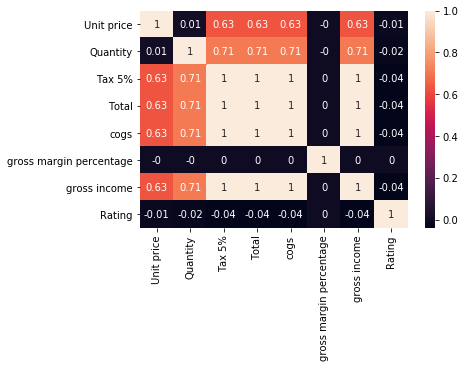

In [35]:
sns.heatmap(np.round(df.corr(), 2), annot = True)